'Done'

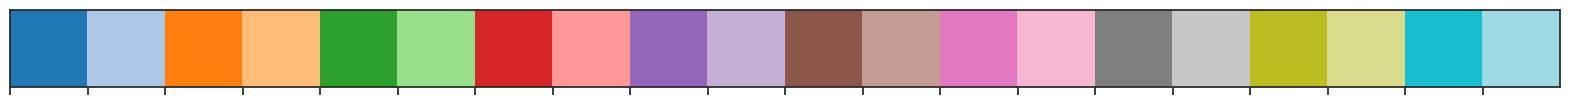

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, json, numpy as np
import pickle, pymysql#; pymysql.install_as_MySQLdb() from sqlalchemy import create_engine
from html import unescape
from unidecode import unidecode
from tqdm import tqdm 
import itertools, re
import tauSearch as tau
import time, matplotlib.pyplot as plt,seaborn as sns 
from matplotlib.colors import ListedColormap
import mysql.connector as sql
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis, pyLDAvis.lda_model; pyLDAvis.enable_notebook()

sns.set(style="ticks", color_codes=True)
sns.palplot(sns.color_palette("tab20", 20)) # https://www.geeksforgeeks.org/seaborn-color-palette/
SEED = 0
'Done'

In [2]:
#db, usr, pas, host = 'rpi', 'root', '', 'localhost'
#conn = sql.connect(db=db,user=usr,host=host,password=pas,use_unicode=True, auth_plugin= "mysql_native_password")
#df = pd.read_sql('SELECT * FROM religion', con=conn)
fData = 'data/joined-text-religion.csv'
df = pd.read_csv(fData)
print(df.shape)
df.head()

(4368, 7)


,date,qryID,entity,site,totalResults,text,text_cleaned
0,2010-01-01,24da1eff83f8cfe4d1977148df77e834,islam,facebook,766,Kalam Guru - PELAJARAN DARI GUS DUR Oleh: Ahma...,kalam guru pelajaran ahmad tohari naik haji be...
1,2010-01-01,4062e31abb113b1c66065ca5b9a93f81,kristen,facebook,292,IMAN Katolik menjawab 18 Jan 2010 ... Apakah y...,iman katolik menjawab ajaran gereja katolik ge...
2,2010-01-01,f34f2441f74132bfb8317f097f86adf7,hindu,facebook,9,Museum Anjuk Ladang - Facebook 18 Jan 2010 ......,museum anjuk ladang facebook yoni lingga bangu...
3,2010-01-01,9bc03155ce36db2e0ce977e07bef0bf5,buddha,facebook,6,Kisah Para Dewa dan Ajaran Tao - Mengenai Inst...,kisah dewa ajaran mengenai institusi caici kul...
4,2010-01-01,47bda847b2e12d27158e99ad076ca5a4,islam,twitter,6,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          4368 non-null   object
 1   qryID         4368 non-null   object
 2   entity        4368 non-null   object
 3   site          4368 non-null   object
 4   totalResults  4368 non-null   int64 
 5   text          3356 non-null   object
 6   text_cleaned  3356 non-null   object
dtypes: int64(1), object(6)
memory usage: 239.0+ KB


In [4]:
df = df.set_index(['date'])
df.head()

,qryID,entity,site,totalResults,text,text_cleaned
date,,,,,,
2010-01-01,24da1eff83f8cfe4d1977148df77e834,islam,facebook,766,Kalam Guru - PELAJARAN DARI GUS DUR Oleh: Ahma...,kalam guru pelajaran ahmad tohari naik haji be...
2010-01-01,4062e31abb113b1c66065ca5b9a93f81,kristen,facebook,292,IMAN Katolik menjawab 18 Jan 2010 ... Apakah y...,iman katolik menjawab ajaran gereja katolik ge...
2010-01-01,f34f2441f74132bfb8317f097f86adf7,hindu,facebook,9,Museum Anjuk Ladang - Facebook 18 Jan 2010 ......,museum anjuk ladang facebook yoni lingga bangu...
2010-01-01,9bc03155ce36db2e0ce977e07bef0bf5,buddha,facebook,6,Kisah Para Dewa dan Ajaran Tao - Mengenai Inst...,kisah dewa ajaran mengenai institusi caici kul...
2010-01-01,47bda847b2e12d27158e99ad076ca5a4,islam,twitter,6,NaN,NaN


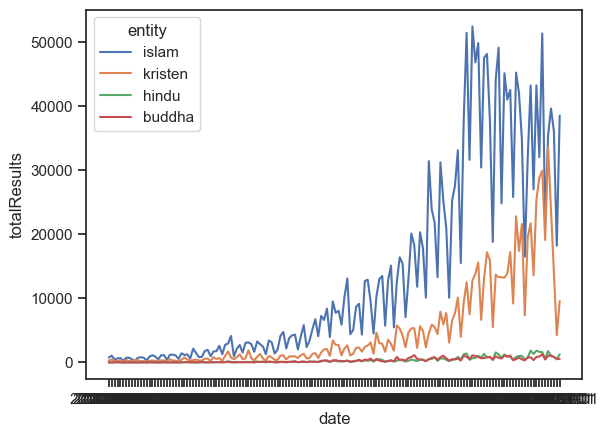

In [5]:
fb = df.loc[df['site'].isin(['facebook'])]
p = sns.lineplot(data=fb, x="date", y="totalResults", hue="entity")

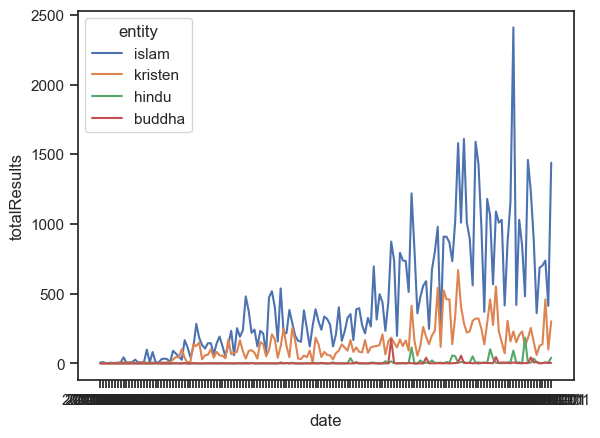

In [6]:
tw = df.loc[df['site'].isin(['twitter'])]
p = sns.lineplot(data=tw, x="date", y="totalResults", hue="entity")

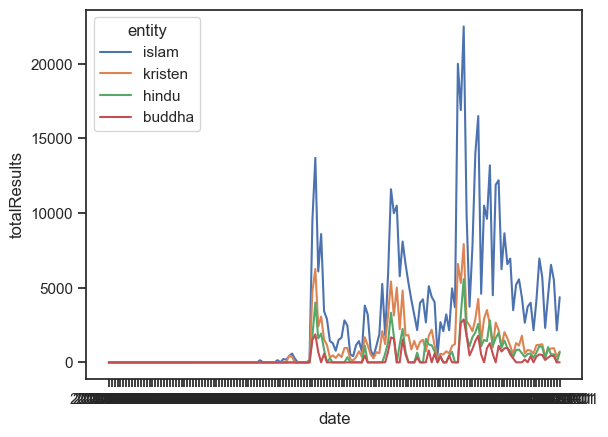

In [7]:
ig = df.loc[df['site'].isin(['instagram'])]
p = sns.lineplot(data=ig, x="date", y="totalResults", hue="entity")

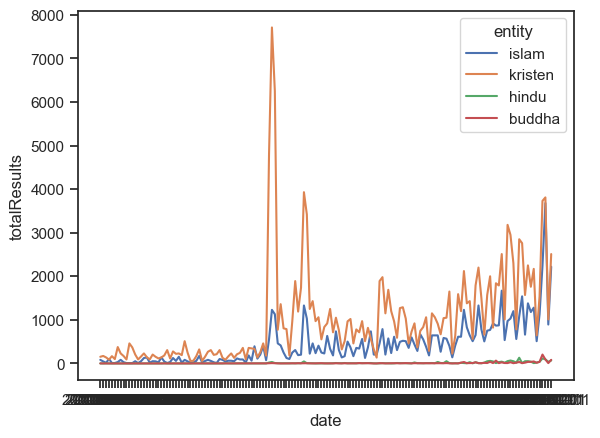

In [8]:
li = df.loc[df['site'].isin(['linkedin'])]
p = sns.lineplot(data=li, x="date", y="totalResults", hue="entity")

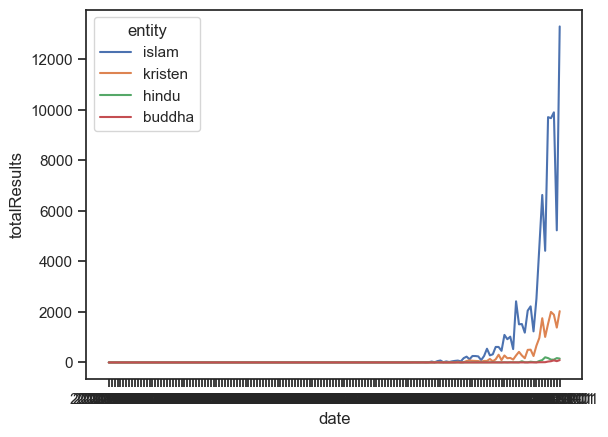

In [9]:
tk = df.loc[df['site'].isin(['tiktok'])]
p = sns.lineplot(data=tk, x="date", y="totalResults", hue="entity")

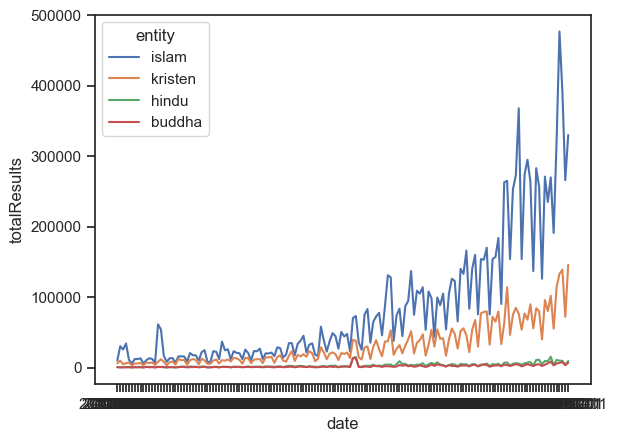

In [10]:
web = df.loc[df['site'].isin(['web'])]
p = sns.lineplot(data=web, x="date", y="totalResults", hue="entity")

In [15]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
data = df[df["entity"].isin(["islam"])]
data.dropna(inplace=True)
vsm = vectorizer.fit_transform(data['text_cleaned'])
print(vsm.shape)
lda = LDA(n_components=4, learning_method='batch', random_state=0).fit(vsm)   
pyLDAvis.lda_model.prepare(lda, vsm, vectorizer)  

(958, 60859)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.101949  0.079984       1        1  31.275036
2      0.064718  0.026117       2        1  25.158539
0     -0.065315 -0.103326       3        1  25.034688
3      0.102546 -0.002776       4        1  18.531737, topic_info=            Term          Freq         Total Category  logprob  loglift
19888      hukum   7278.000000   7278.000000  Default  30.0000  30.0000
21751      islam  34263.000000  34263.000000  Default  29.0000  29.0000
31628     maulid   6002.000000   6002.000000  Default  28.0000  28.0000
49174    selamat   4251.000000   4251.000000  Default  27.0000  27.0000
60204    youtube   2488.000000   2488.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
45221   ramadhan    483.905594   2064.465043   Topic4  -5.8659   0.2349
20948  indonesia    539.692784   4790.835915   Topic4  -5.7568  -0.4978
20142     ibadah    449.919028   1382.086570   Topic4  -5.9387   0.5634
53927      tahun    466.887601   2282.268715   Topic4  -5.9017   0.0988
39173      orang    451.552684   3313.287667   Topic4  -5.9351  -0.3073

[333 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
217        1  0.996923  abstract
218        1  0.975720   abstrak
218        3  0.006419   abstrak
218        4  0.012838   abstrak
387        2  0.951340     added
...      ...       ...       ...
60081      3  0.999361     years
60204      3  0.994517   youtube
60204      4  0.005224   youtube
60227      2  0.963761       yrs
60438      3  0.987282      zaen

[685 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

In [12]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
data = df[df["entity"].isin(["kristen"])]
data.dropna(inplace=True)
vsm = vectorizer.fit_transform(data['text_cleaned'])
print(vsm.shape)
lda = LDA(n_components=3, learning_method='batch', random_state=0).fit(vsm)   
pyLDAvis.lda_model.prepare(lda, vsm, vectorizer)  

(936, 51864)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.021798 -0.181538       1        1  82.630868
2     -0.173753  0.106842       2        1  13.144211
0      0.195551  0.074696       3        1   4.224921, topic_info=              Term          Freq         Total Category  logprob  loglift
20786      katolik  31274.000000  31274.000000  Default  30.0000  30.0000
17995    indonesia  10118.000000  10118.000000  Default  29.0000  29.0000
49267  universitas   5771.000000   5771.000000  Default  28.0000  28.0000
48651        tuhan  12246.000000  12246.000000  Default  27.0000  27.0000
51299        yesus  11542.000000  11542.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
8477         damai     66.730856    516.149857   Topic3  -6.2637   1.1184
34120       paskah    108.461037   5272.616810   Topic3  -5.7780  -0.7197
20786      katolik    122.814668  31274.901051   Topic3  -5.6537  -2.3757
25124        likes     67.682502    901.351881   Topic3  -6.2496   0.5751
30123       minggu     68.184991   2303.340494   Topic3  -6.2422  -0.3557

[225 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
344        2  0.977604  administration
495        1  0.972501           agama
495        2  0.023471           agama
495        3  0.004082           agama
709        1  0.998675          ajaran
...      ...       ...             ...
51299      1  0.965005           yesus
51299      2  0.006411           yesus
51299      3  0.028589           yesus
51529      1  0.999650         youtube
51529      2  0.000300         youtube

[346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [13]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
data = df[df["entity"].isin(["hindu"])]
data.dropna(inplace=True)
vsm = vectorizer.fit_transform(data['text_cleaned'])
print(vsm.shape)
lda = LDA(n_components=2, learning_method='batch', random_state=0).fit(vsm)   
pyLDAvis.lda_model.prepare(lda, vsm, vectorizer)  

(753, 40221)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.181993  0.0       1        1  99.297591
0     -0.181993  0.0       2        1   0.702409, topic_info=              Term          Freq         Total Category  logprob  loglift
23464        murah    125.000000    125.000000  Default  30.0000  30.0000
3956   berlangsung     62.000000     62.000000  Default  29.0000  29.0000
6641         cover     34.000000     34.000000  Default  28.0000  28.0000
7136         dayak    107.000000    107.000000  Default  27.0000  27.0000
12643        hindu  27984.000000  27984.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
3976     berlokasi      1.803821     29.569704   Topic2  -7.6513   2.1616
29213   protagonis      1.717230     22.294366   Topic2  -7.7005   2.3948
12105      hanoman      1.522472     38.672032   Topic2  -7.8209   1.7236
34342         spot      1.508054     32.964650   Topic2  -7.8304   1.8738
3956   berlangsung      1.435768     62.218466   Topic2  -7.8796   1.1895

[103 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
402        1  0.999978       agama
586        1  0.999882      ajaran
1820       2  1.002061        arys
1821       1  0.234210  arys_mikro
1821       2  0.702629  arys_mikro
...      ...       ...         ...
38092      1  0.999982        umat
38278      1  1.000107     upacara
38630      1  0.998818       versi
39115      1  0.999658        wasa
39344      1  1.000013       widhi

[134 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [14]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
data = df[df["entity"].isin(["buddha"])]
data.dropna(inplace=True)
vsm = vectorizer.fit_transform(data['text_cleaned'])
print(vsm.shape)
lda = LDA(n_components=3, learning_method='batch', random_state=0).fit(vsm)   
pyLDAvis.lda_model.prepare(lda, vsm, vectorizer)  

(709, 34690)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.115266 -0.072264       1        1  60.003478
2     -0.069230  0.085375       2        1  30.048555
1      0.184496 -0.013111       3        1   9.947966, topic_info=           Term         Freq         Total Category  logprob  loglift
10692      hari  6457.000000   6457.000000  Default  30.0000  30.0000
33662    waisak  4916.000000   4916.000000  Default  29.0000  29.0000
25990      raya  4241.000000   4241.000000  Default  28.0000  28.0000
27973   selamat  2891.000000   2891.000000  Default  27.0000  27.0000
26264  renungan  2881.000000   2881.000000  Default  26.0000  26.0000
...         ...          ...           ...      ...      ...      ...
12974      juni   120.313717    507.071625   Topic3  -5.9724   0.8693
12413   jakarta   120.235027    572.820550   Topic3  -5.9730   0.7467
30665     tahun   121.589590   1593.785713   Topic3  -5.9618  -0.2654
17379   makhluk    99.992679    487.853617   Topic3  -6.1574   0.7229
322       agama   132.043066  18919.804116   Topic3  -5.8794  -2.6570

[256 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
88         1  0.997307   abstract
322        1  0.781721      agama
322        2  0.211313      agama
322        3  0.006977      agama
413        3  0.897164      ahass
...      ...       ...        ...
33662      3  0.516018     waisak
33993      1  0.995133  wikipedia
34487      1  0.017458      young
34487      2  0.977661      young
34491      2  0.998471    youtube

[420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])